In [2]:
import pandas as pd
import re
import collections
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
main = pd.read_csv('lyrics.csv')
nltk.download('stopwords')
main1 = main.set_index("year", drop = False)
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei_John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
first = main1[(main1.year>1958) & (main1.year<1970)]
second = main1[(main1.year>1969) & (main1.year<1980)]
third = main1[(main1.year>1979) & (main1.year<1990)]
fourth = main1[(main1.year>1989) & (main1.year<2000)]
fifth = main1[(main1.year>1999) & (main1.year<2010)]
sixth = main1[(main1.year>2009) & (main1.year<2020)]

In [4]:
type(fourth['lyrics'].iloc[0])

str

In [5]:
def clean(text):
    ### clean a lyric string
    # split string into lines
    stopw = set(stopwords.words('english'))
    if isinstance(text, str):
        #print(text)
        text = text.split('\n')
        # drop missing lines
        text = [i for i in text if i]
        # drop bracketed lines (e.g. producer info, song part indicators)
        text = [i for i in text if i[0]!='[']
        # join back into single string
        text = ' '.join(text)
        # filter out non-alpha-numeric characters 
        text = re.sub(r'[^\s\w]+', '', text)
        # strip capitalization
        text = text.lower()
        # drop stopwords
        text = ' '.join([i for i in text.split() if i not in stopw])
    return text

In [6]:
first2 = first['lyrics'].map(clean)
second2 = second['lyrics'].map(clean)
third2 = third['lyrics'].map(clean)
fourth2 = fourth['lyrics'].map(clean)
fifth2 = fifth['lyrics'].map(clean)
sixth2 = sixth['lyrics'].map(clean)

In [8]:
first2

year
1959    1814 took little trip along colonel jackson mi...
1959    well north carolina way back hills old pappy s...
1959    well ive traveler life never took home never t...
1959    long ago poor heart broken said crazy heart se...
1959    heartache number one left never knew could hur...
                              ...                        
1969                                                  NaN
1969                                                  NaN
1969    one name heart one ill remain thats heartaches...
1969    delia oh delia long buddys talkin bout delia s...
1969                                                  NaN
Name: lyrics, Length: 447, dtype: object

In [58]:
def allwords(corp):
    return " ".join(corp[corp.notnull()].values)
allfirst = allwords(first2)
allsecond = allwords(second2)
allthird = allwords(third2)
allfourth = allwords(fourth2)
allfifth = allwords(fifth2)
allsixth = allwords(sixth2)

How many most common words to print: 50

OK. The 50 most common words are as follows

im :  1038
dont :  830
love :  742
like :  740
know :  644
got :  564
get :  489
yeah :  478
aint :  458
time :  440
one :  429
back :  418
baby :  416
go :  413
way :  406
youre :  399
oh :  381
little :  377
ive :  360
never :  359
right :  338
cant :  335
thats :  332
ill :  323
cause :  320
day :  318
good :  313
see :  310
said :  303
well :  299
life :  299
say :  296
every :  291
still :  281
man :  279
girl :  278
gonna :  269
think :  265
make :  260
let :  255
need :  254
take :  253
theres :  249
could :  247
shes :  245
night :  245
want :  243
heart :  240
na :  231
wanna :  224
[('im', 1038), ('dont', 830), ('love', 742), ('like', 740), ('know', 644), ('got', 564), ('get', 489), ('yeah', 478), ('aint', 458), ('time', 440), ('one', 429), ('back', 418), ('baby', 416), ('go', 413), ('way', 406), ('youre', 399), ('oh', 381), ('little', 377), ('ive', 360), ('never', 359), ('right', 338), ('ca

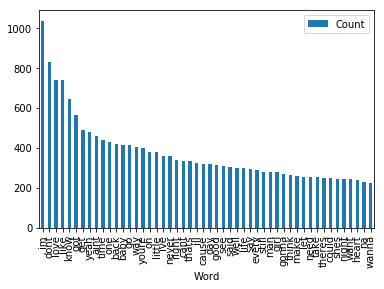

In [60]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.

# To eliminate duplicates, remember to split by punctuation, and use case demiliters
def commonWords(x):
    wordcount = {}
    i = 0
    for word in (x.split(" ")):
        #pint(word)
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
        i += 1
    return wordcount
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(commonWords(allwords(fifth2)))
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
print(lst)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
print(df)
df.plot.bar(x='Word',y='Count')